In [1]:
# importing libraries for data preprocessing
import pandas as pd

# import libraries for plotting
import cufflinks as cf
import plotly.offline
from  plotly.offline import plot_mpl
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# importing arima model
from pyramid.arima import auto_arima

# import libraries for error metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning:


    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    



In [2]:
# data preprocessing
# reading dataset
data = pd.read_csv("PowerData.csv",index_col=0)
data = data.loc[:'2010-01-01']
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [3]:
# making index datetime
data.index = pd.to_datetime(data.index)


In [4]:
# chainging column name
data.columns = ['Energy Production']

data.head()

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [5]:
#create train/test datasets
train = data[:int((70*len(data)/100))]
valid = data[int((70*len(data)/100)):]

In [6]:
#plotting the data 

data.iplot(title="power")

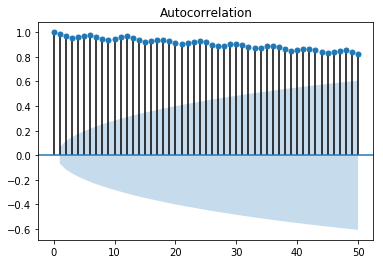

In [7]:
# plotting auto correllation function values
plot_acf(data, lags=50)
pyplot.show()

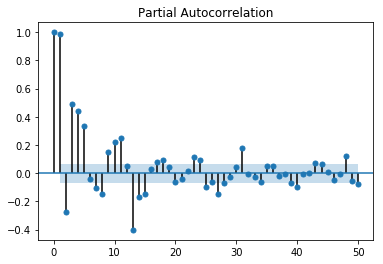

In [8]:
# plotting partial auto correlation function values
plot_pacf(data, lags=50)
pyplot.show()

In [9]:
#train the arima model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, m=12)
model.fit(train)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=2812.424, BIC=2821.204, Fit time=0.034 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=1763.735, BIC=1781.296, Fit time=1.053 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=2259.770, BIC=2277.331, Fit time=0.537 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=2700.172, BIC=2713.343, Fit time=0.078 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=1761.815, BIC=1774.986, Fit time=0.573 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=1763.655, BIC=1

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 0, 0, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [10]:
# make predictions 
future_forecast = model.predict(n_periods=len(valid))
train_forecast = model.predict(n_periods=len(train))

future_forecast


array([ 63.41794177,  65.51961121,  72.87068891,  81.92135795,
        78.05732605,  72.54976934,  65.5740967 ,  63.90357637,
        69.22783602,  74.95712659,  77.52996003,  69.71280285,
        65.52564474,  67.59148066,  74.59376407,  83.30788373,
        79.57674492,  74.3312423 ,  67.62806766,  66.05305247,
        71.14384696,  76.65510411,  79.11421121,  71.64024868,
        67.62487006,  69.61898584,  76.32900389,  84.69210026,
        81.11819475,  76.10231963,  69.68168652,  68.18211149,
        73.0645915 ,  78.35494618,  80.71621252,  73.56227206,
        69.71958854,  71.63843229,  78.0742452 ,  86.09613639,
        82.67718189,  77.87781198,  71.7310539 ,  70.30116775,
        74.98629495,  80.06304734,  82.33221413,  75.48354714,
        71.80757041,  73.65325299,  79.82718328,  87.52134517,
        84.25152852,  79.65908275,  73.77525277,  72.41174486,
        76.90809674,  81.77985866,  83.9610208 ,  77.40467949,
        73.88864321,  75.66405691,  81.58716204,  88.96

In [11]:
# create a comparison dataframe
future_forecast = pd.DataFrame(future_forecast,index = valid.index,columns=['Prediction'])
train_forecast = pd.DataFrame(train_forecast,index = train.index,columns=['Prediction'])
pd.concat([valid,future_forecast],axis=1).iplot(title="Prediction",xTitle='TIme Stamp',yTitle='Demand')

In [12]:
# plotting whole dataset with predictions
pd.concat([data,future_forecast],axis=1).iplot()

In [13]:
#  printing r2 score of our model 
rms = sqrt(mean_squared_error(valid,future_forecast))
print(rms)

5.193594196057593


In [14]:
#  printing mean square error of our model 
r2 = r2_score(valid,future_forecast)
r2

0.8250281746259254